# Workshop 19: Classification Problems

In [1]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
from numpy import matlib
import pandas as pd
import matplotlib.pyplot as plt # Plot commands

import scipy         # Another numerical library
from scipy import stats

# Define some colors using the RGB format
CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Machine Learning Model: k-NN

Every object that we define as part of a category is made up of many measurable characteristics. In machine learning, taking only these measurements we try to guess which category the object belongs to. 

For a concrete example, let us take a look at the classification of iris plants based on the measurements of their flowers. We start by grabbing a dataset using the *pandas* library. (Here is the cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url)

iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


How much data do we have?

In [7]:
iris_data.shape

(149, 5)

So, there are 149 entries. We would like to visualize this data somehow.

In [24]:
iris_species = iris_data['species']
print(iris_species.unique())

iris_measurements = iris_data.drop('species', axis = 1)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


It turns out that we have three species of iris. Let us assign a color to each one of them:

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Petal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs. Petal Width')]

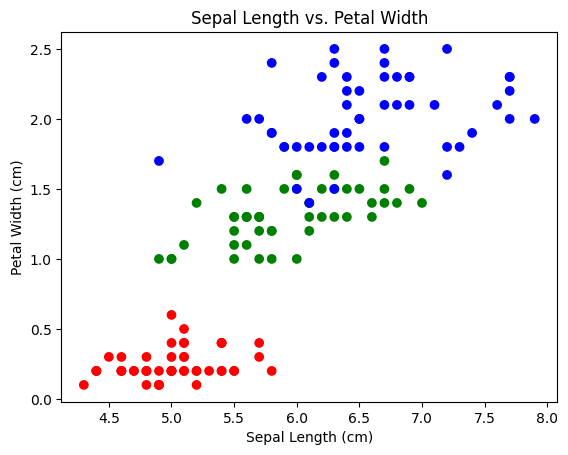

In [31]:
iris_colors = iris_species.replace(to_replace="Iris-setosa", value="red")
iris_colors = iris_colors.replace(to_replace="Iris-versicolor", value="green")
iris_colors = iris_colors.replace(to_replace="Iris-virginica", value="blue")

fig, ax = plt.subplots()
ax.scatter(iris_measurements['sepal_length'], iris_measurements['petal_width'], c = iris_colors.values)
ax.set(xlabel = 'Sepal Length (cm)', ylabel = 'Petal Width (cm)', title = 'Sepal Length vs. Petal Width')

Now we use the k-NN approach to classify the flowers in the parameter space

In [57]:
def mode_calc(x):
    values, counts = np.unique(x, return_counts = True)
    m = counts.argmax()
    return values[m]

def kNN_Classifier(train_set_coords, labels, test_coords, k):
    distance = np.array([train_set_coords[i] - test_coords[i] * np.ones(len(train_set_coords[i])) for i in range(0, len(train_set_coords))])
    distance = np.sqrt(np.sum(distance * distance, axis = 0))
    labeled_points = list(zip(distance, labels))
    labeled_points.sort(key = lambda x: x[0])
    neighbours = [x[1] for x in labeled_points[0:k]]
    return mode_calc(neighbours)

def kNN_Coloring(trains_set_coords, labels, test_coords, k):
    species = kNN_Classifier(trains_set_coords, labels, test_coords, k)
    match species:
        case "Iris-setosa":
            return CF_vermillion
        case "Iris-versicolor":
            return CF_green
        case "Iris-virginica":
            return CF_sky

In [58]:
sepal_length = iris_measurements['sepal_length']
sepal_width = iris_measurements['sepal_width']
petal_length = iris_measurements['petal_length']
petal_width = iris_measurements['petal_width']

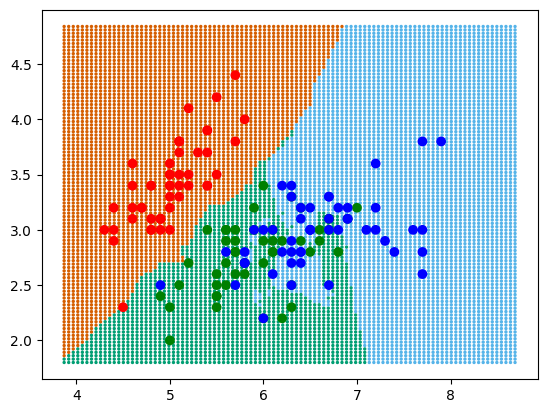

In [63]:
nPts = 100

sepal_l, sepal_w = np.mgrid[0.9 * min(sepal_length):1.1 * max(sepal_length):1j * nPts,
                            0.9 * min(sepal_width):1.1 * max(sepal_width):1j * nPts]

XS = sepal_l.flatten()
YS = sepal_w.flatten()

res = np.empty((nPts * nPts), dtype = (float, 3))

for i in range(0, nPts**2):
    res[i] = kNN_Coloring([sepal_length, sepal_width], iris_species, [XS[i], YS[i]], 5)

fig, ax = plt.subplots()
ax.scatter(XS, YS, c = res, s = 2)
ax.scatter(sepal_length, sepal_width, c = iris_colors.values)

For our plots above, we only used two out of four parameters for obvious reasons. Of course, the training should be better if we use all the information available. The important question here is: how many neighbors should one use? Keep in mind that we only have 149 points in our data set. How can we use them to assess the quality of our model?

The answer is to proceed as follows:

1. Take a portion of our data set (say, 60%) and call it the training_set. The remaining 40% will be our test_set.
2. Use the training_set in the kNN_Classifier function as the Train_Set_Coords
3. Pick the NN number. 
4. Use the kNN_Classifier to classify the training_set and record the success rate.
5. Use the kNN_Classifier to classify the test_set and record the success rate.
6. Repeat for different values of NN and plot the success rates of the training and test sets for different $k$'s.

Write a function that takes the iris dataset and the fraction to be converted to the training_set and returns a training set and a test set.